In [4]:
from google.colab import files
uploaded = files.upload()

Saving BrainTumor.csv to BrainTumor (1).csv


In [5]:
import pandas as pd
file_name = list(uploaded.keys())[0]
tumor_data = pd.read_csv(file_name)

tumor_data.head()

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


In [6]:
tumor_data.describe()

,Patient ID,Age,Time to Recurrence (months),Survival Time (months)
count,2000.000000,2000.000000,1438.000000,2000.000000
mean,1000.500000,56.153000,16.099444,34.270000
std,577.494589,6.078492,3.128291,8.606343
min,1.000000,42.000000,6.000000,9.000000
25%,500.750000,51.000000,14.000000,28.000000
50%,1000.500000,56.000000,16.000000,36.000000
75%,1500.250000,61.000000,18.000000,42.000000
max,2000.000000,72.000000,36.000000,72.000000


In [7]:
missing_values = tumor_data.isnull().sum()
missing_percentage = (missing_values / len(tumor_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)


                             Missing Values  Percentage
Patient ID                                0         0.0
Age                                       0         0.0
Gender                                    0         0.0
Tumor Type                                0         0.0
Tumor Grade                               0         0.0
Tumor Location                            0         0.0
Treatment                                 0         0.0
Treatment Outcome                         0         0.0
Time to Recurrence (months)             562        28.1
Recurrence Site                         562        28.1
Survival Time (months)                    0         0.0


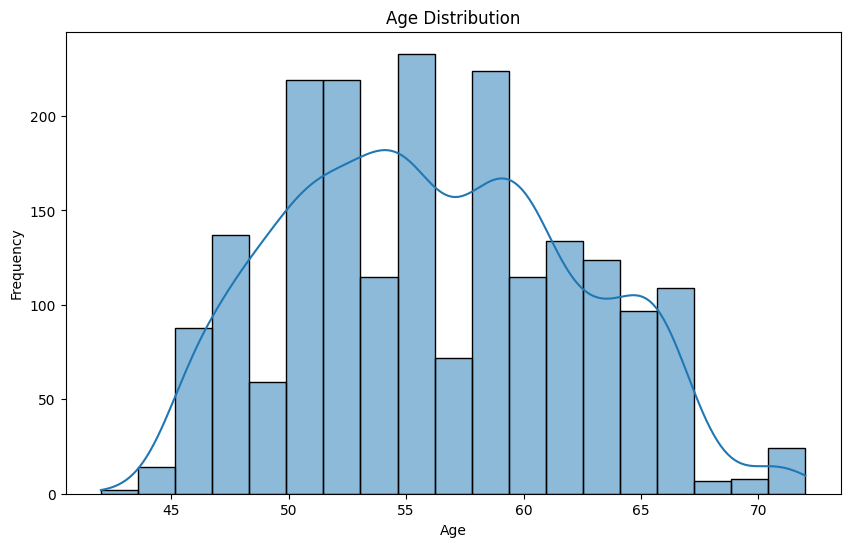

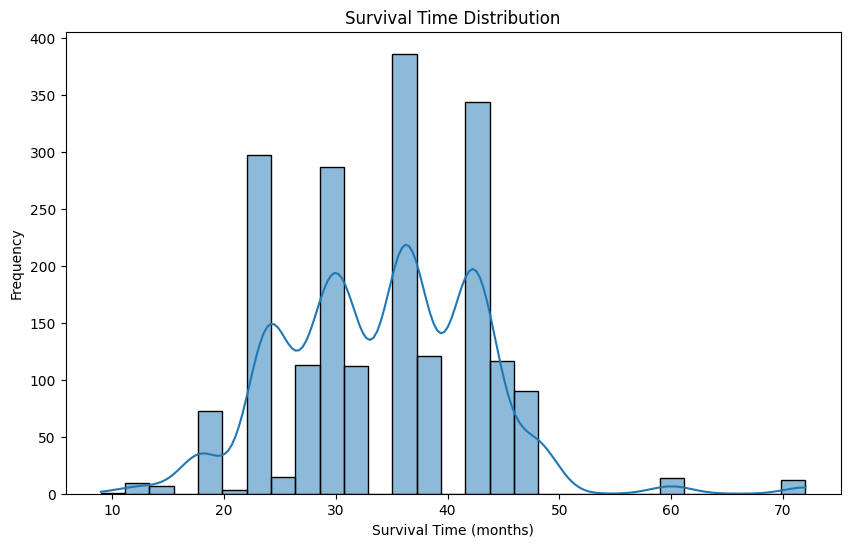

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(tumor_data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(tumor_data['Survival Time (months)'], kde=True)
plt.title('Survival Time Distribution')
plt.xlabel('Survival Time (months)')
plt.ylabel('Frequency')
plt.show()


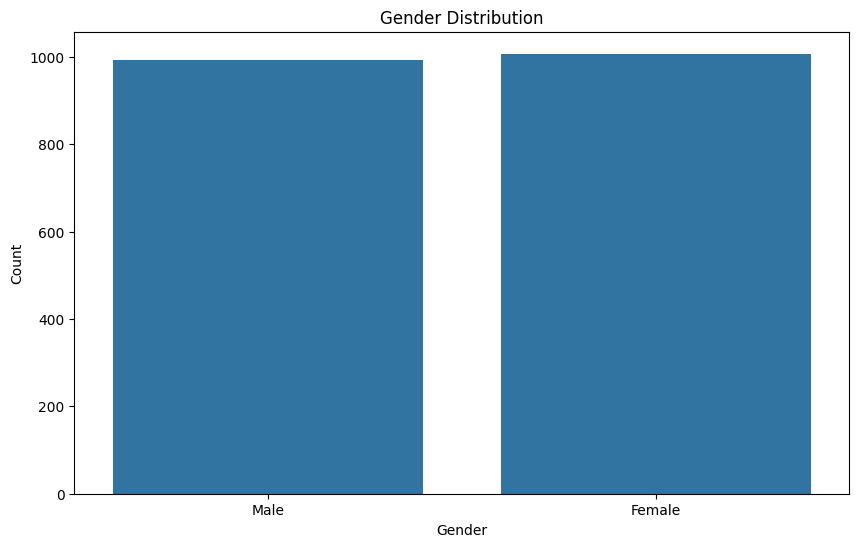

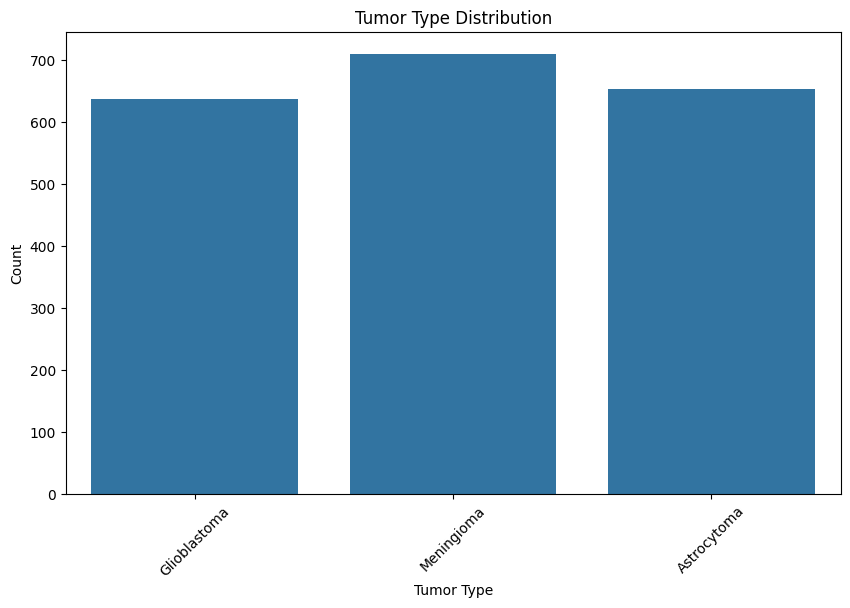

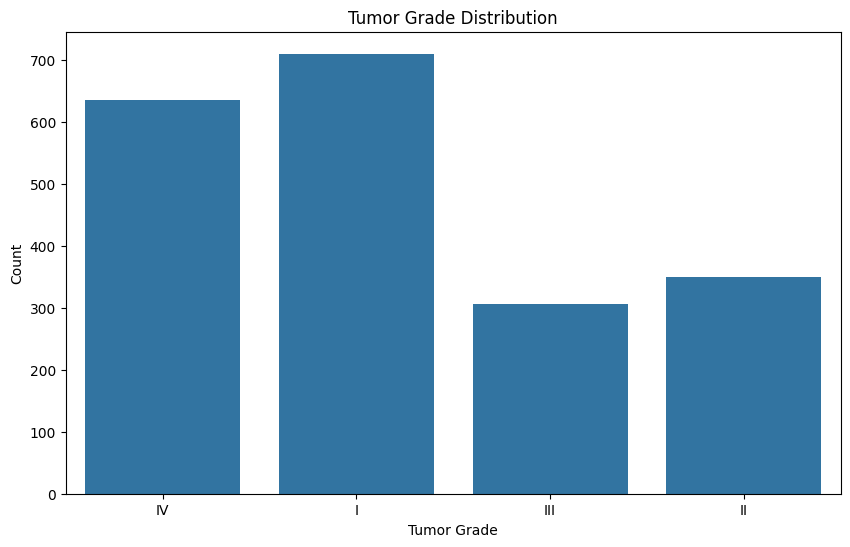

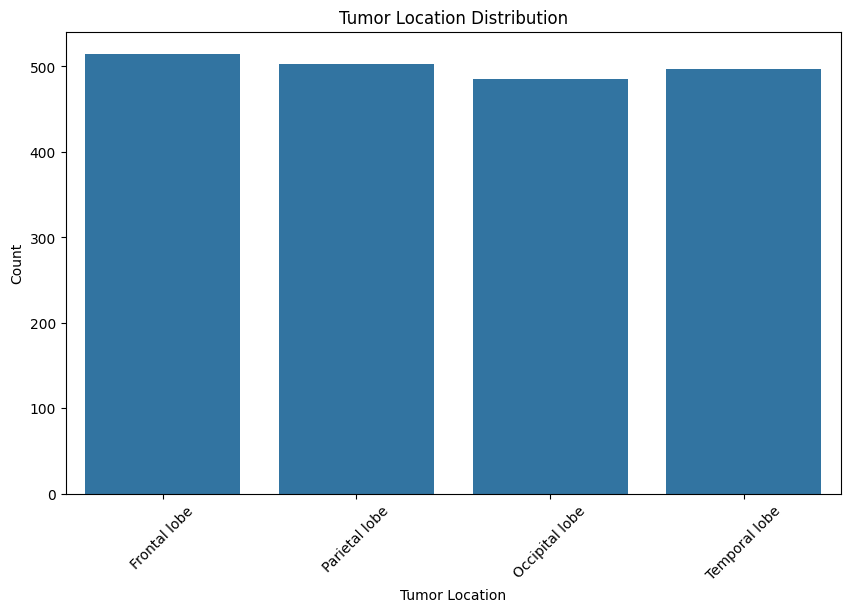

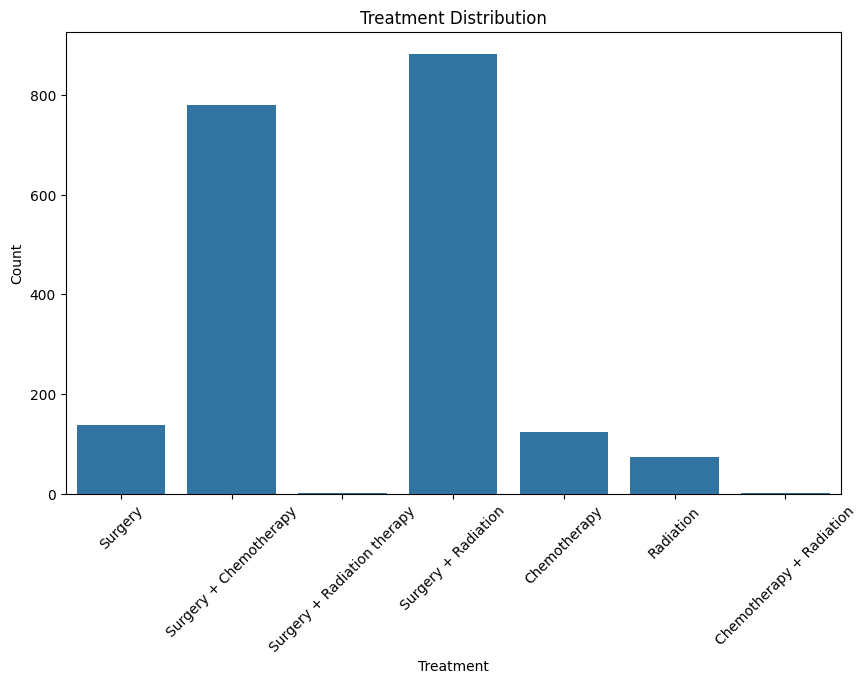

In [9]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=tumor_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Tumor Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Tumor Type', data=tumor_data)
plt.title('Tumor Type Distribution')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Tumor Grade Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Tumor Grade', data=tumor_data)
plt.title('Tumor Grade Distribution')
plt.xlabel('Tumor Grade')
plt.ylabel('Count')
plt.show()

# Tumor Location Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Tumor Location', data=tumor_data)
plt.title('Tumor Location Distribution')
plt.xlabel('Tumor Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Treatment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Treatment', data=tumor_data)
plt.title('Treatment Distribution')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

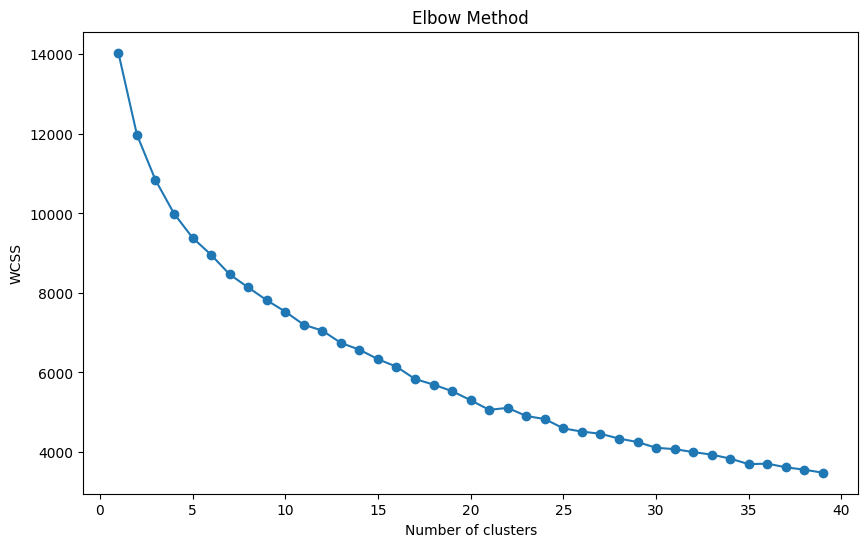

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


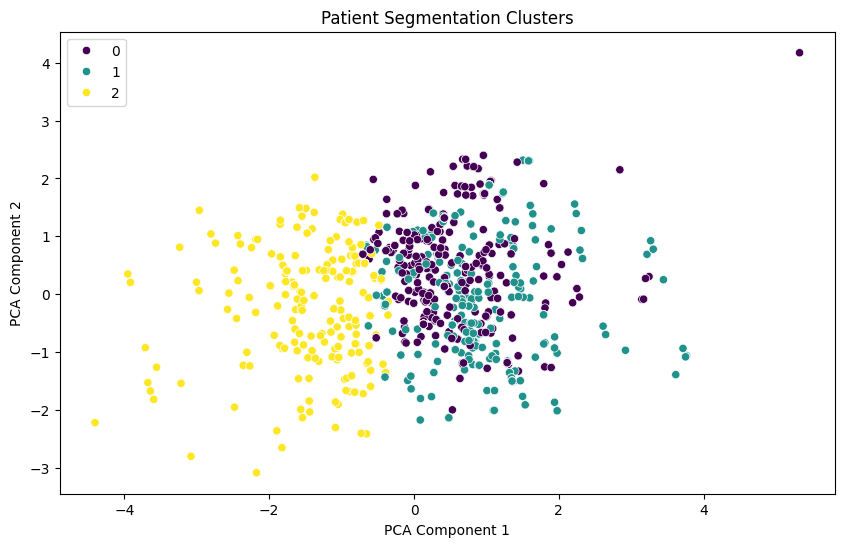

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = tumor_data

# Drop the 'Patient ID' as it's not useful for clustering
data = data.drop('Patient ID', axis=1)

# Define feature columns
features = ['Age', 'Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Time to Recurrence (months)', 'Survival Time (months)']

# Preprocessing pipeline
numeric_features = ['Age', 'Time to Recurrence (months)', 'Survival Time (months)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X = preprocessor.fit_transform(data)

# Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=35, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Patient Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Sample data
data = tumor_data

# Drop the 'Patient ID' and 'Survival Time (months)' as they are not useful for prediction
data = data.drop(['Patient ID', 'Survival Time (months)'], axis=1)

# Drop rows with missing target values
data = data.dropna(subset=['Recurrence Site'])

# Define feature columns and target column
features = ['Age', 'Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Time to Recurrence (months)']
target = 'Recurrence Site'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Age', 'Time to Recurrence (months)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


Accuracy: 0.9965277777777778
Classification Report:
                precision    recall  f1-score   support

  Frontal lobe       0.99      1.00      0.99        80
Occipital lobe       1.00      0.98      0.99        60
 Parietal lobe       1.00      1.00      1.00        74
 Temporal lobe       1.00      1.00      1.00        74

      accuracy                           1.00       288
     macro avg       1.00      1.00      1.00       288
  weighted avg       1.00      1.00      1.00       288



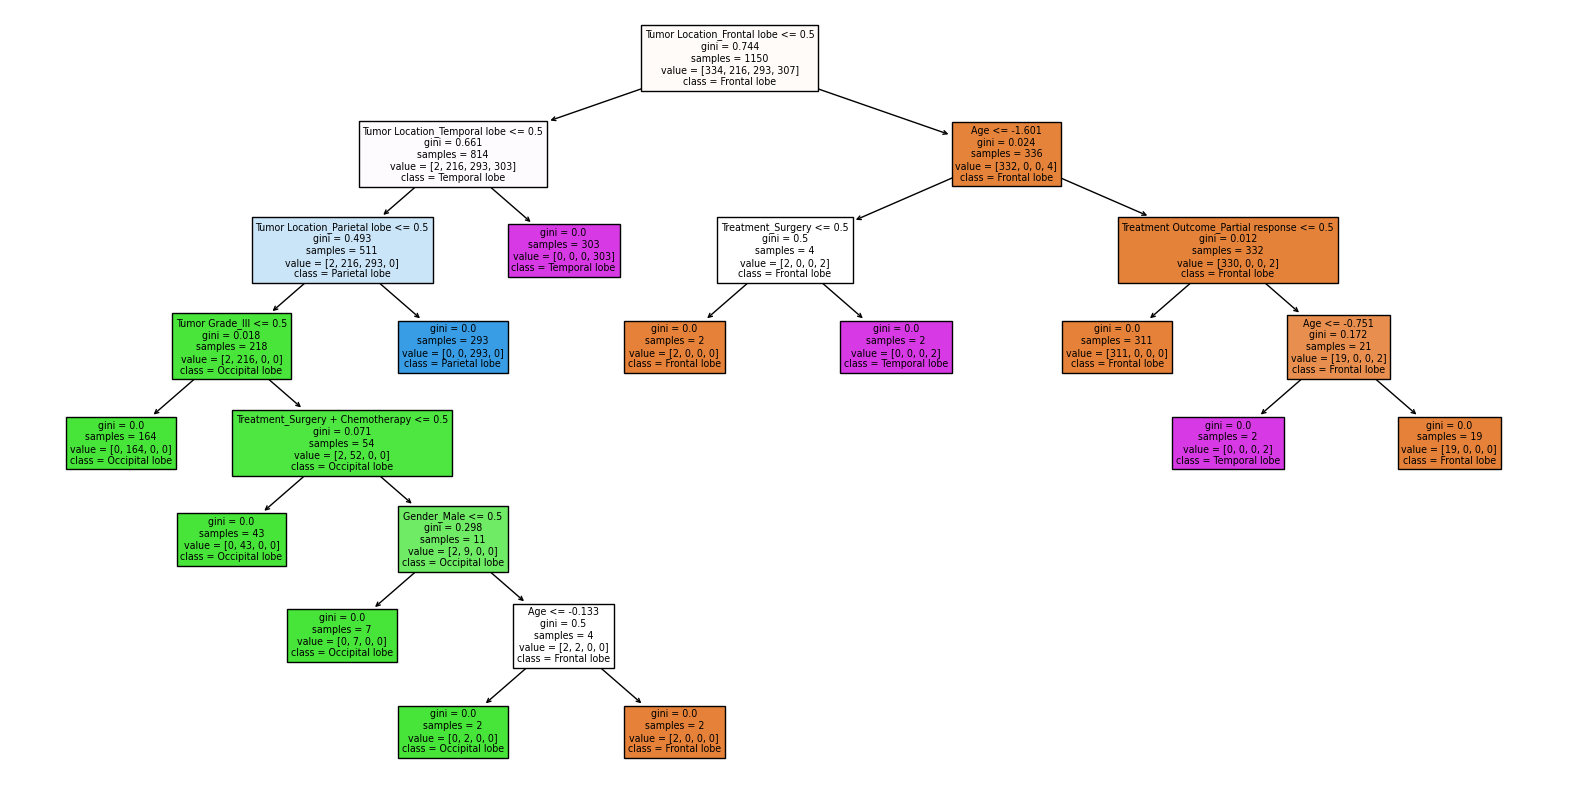

In [27]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_prepared, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_prepared)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=numeric_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)), class_names=clf.classes_, filled=True)
plt.show()


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score: 1.00
Test Set Accuracy: 1.00
Classification Report:
                precision    recall  f1-score   support

  Frontal lobe       1.00      1.00      1.00        80
Occipital lobe       1.00      1.00      1.00        60
 Parietal lobe       1.00      1.00      1.00        74
 Temporal lobe       1.00      1.00      1.00        74

      accuracy                           1.00       288
     macro avg       1.00      1.00      1.00       288
  weighted avg       1.00      1.00      1.00       288



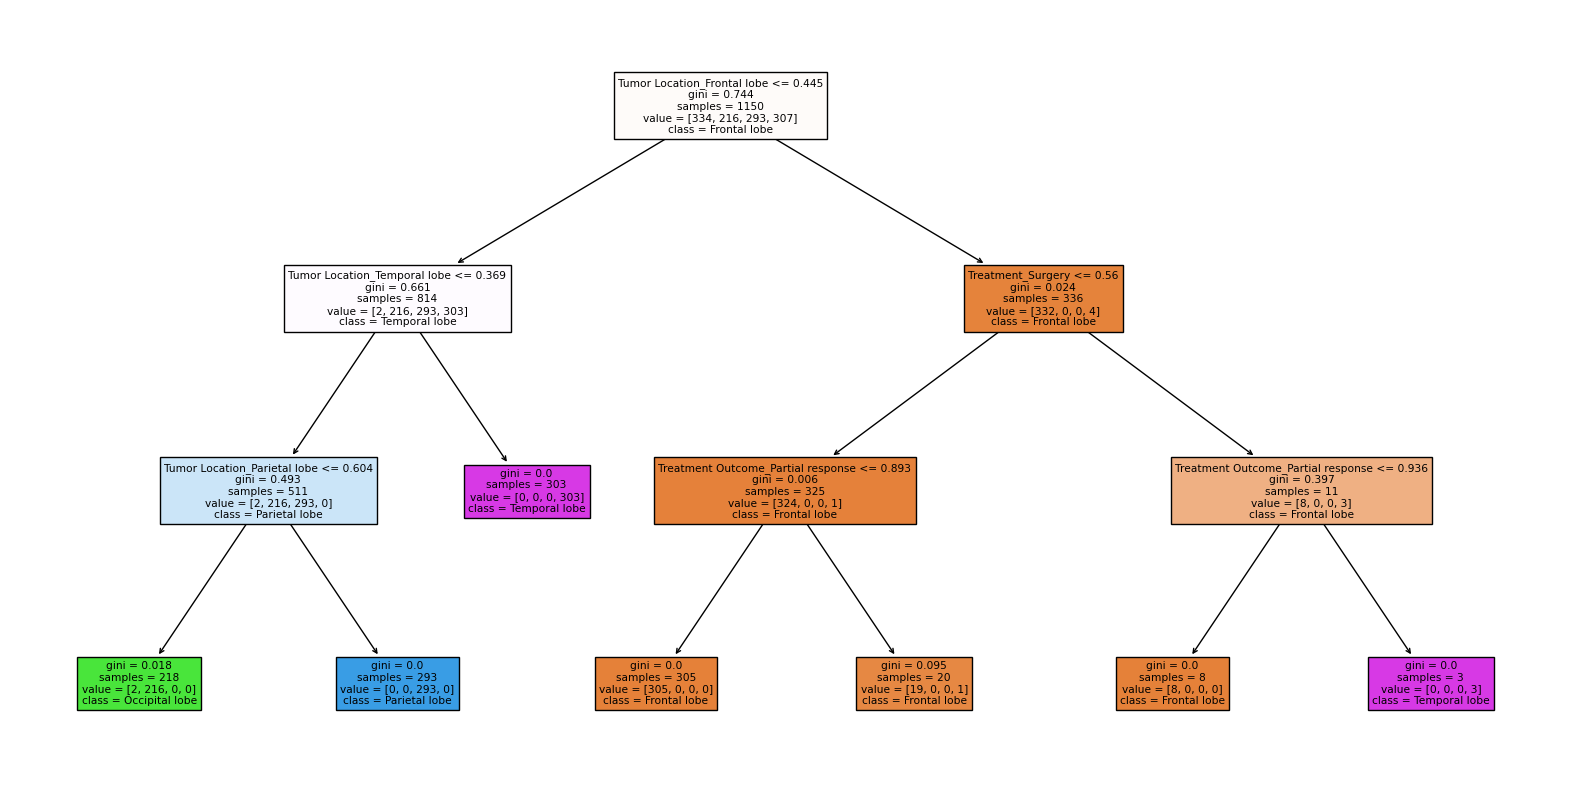

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_prepared, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')

# Train the model with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_prepared, y_train)

# Predict on the test set
y_pred = best_clf.predict(X_test_prepared)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_clf, feature_names=numeric_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)), class_names=best_clf.classes_, filled=True)
plt.show()


                                  Feature  Importance
11            Tumor Location_Frontal lobe    0.364123
14           Tumor Location_Temporal lobe    0.337357
13           Tumor Location_Parietal lobe    0.291455
23     Treatment Outcome_Partial response    0.005244
18                      Treatment_Surgery    0.001820
24  Treatment Outcome_Progressive disease    0.000000
22    Treatment Outcome_Complete response    0.000000
21  Treatment_Surgery + Radiation therapy    0.000000
20          Treatment_Surgery + Radiation    0.000000
19       Treatment_Surgery + Chemotherapy    0.000000
17                    Treatment_Radiation    0.000000
16     Treatment_Chemotherapy + Radiation    0.000000
15                 Treatment_Chemotherapy    0.000000
0                                     Age    0.000000
1             Time to Recurrence (months)    0.000000
12          Tumor Location_Occipital lobe    0.000000
10                         Tumor Grade_IV    0.000000
9                         Tu

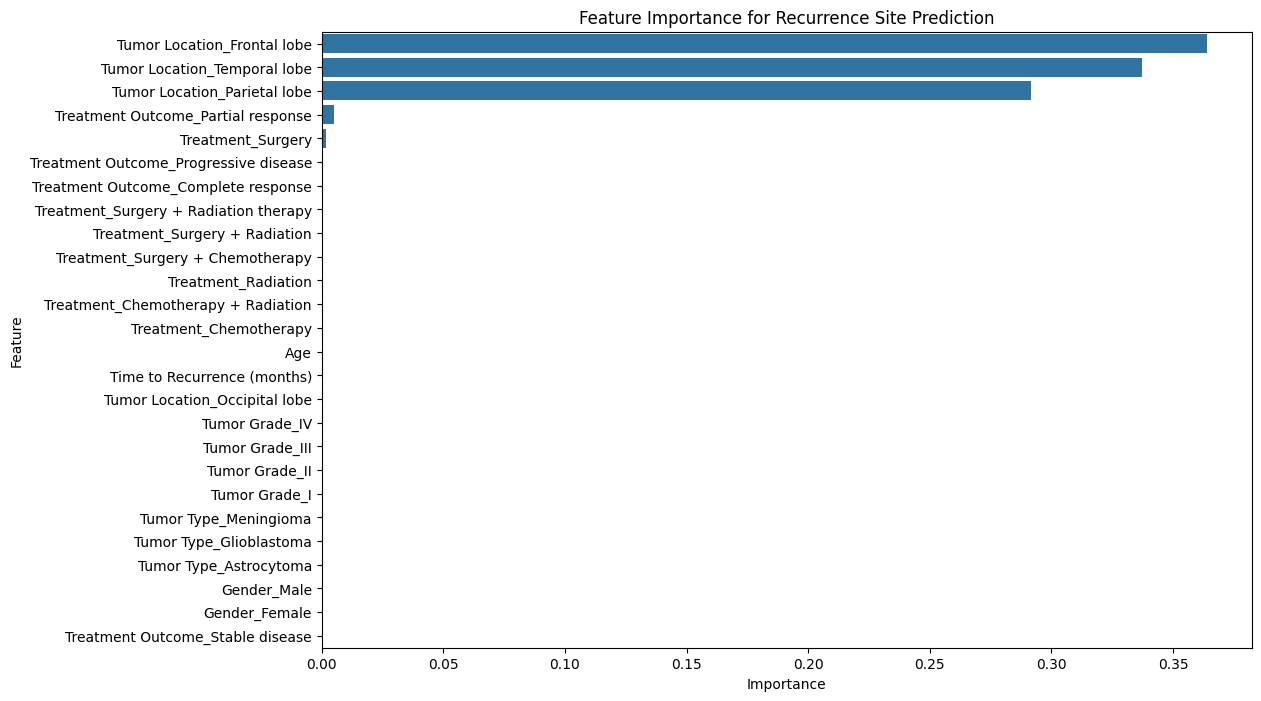

In [29]:
# Assuming 'best_clf' is the best model from the grid search
feature_importances = best_clf.feature_importances_

# Get feature names
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Recurrence Site Prediction')
plt.show()


Insights
Tumor Location: The location of the tumor is the most critical factor in predicting the recurrence site. Specifically, tumors in the frontal, temporal, and parietal lobes are highly influential.

Treatment Outcome and Type: While some treatment outcomes and types have very low importance, the model found "Partial response" to be somewhat relevant.

Other Features: Features like age, time to recurrence, tumor grade, and tumor type did not significantly influence the model’s predictions in this specific case. This might be due to the small sample size or specific characteristics of the dataset used.